### Perform General Data Exploration and Cleaning

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Option setting 
%matplotlib inline 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Importing data
df = pd.read_csv("lung_cancer_prediction_dataset.csv")
df.head()

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,Survival_Years,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80.0,Male,Yes,30,29,No,No,No,NaN,0,Yes,Low,Yes,No,Poor,No,NaN,Developing,690000.0,2.44,0.0
1,1,Iran,84,53.0,Male,No,0,0,Yes,No,No,NaN,0,Yes,Low,Yes,No,Poor,No,NaN,Developing,27000.0,2.10,0.0
2,2,Mexico,128,47.0,Male,Yes,12,6,Yes,No,No,NaN,0,Yes,Medium,No,No,Poor,Yes,NaN,Developing,28000.0,1.11,0.0
3,3,Indonesia,273,39.0,Female,No,0,0,No,Yes,No,NaN,0,Yes,Low,No,No,Poor,No,NaN,Developing,40000.0,0.75,0.0
4,4,South Africa,59,44.0,Female,No,0,0,Yes,No,No,NaN,0,Yes,Medium,Yes,No,Poor,No,NaN,Developing,15000.0,2.44,0.0


In [3]:
# Checking for general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220613 non-null  float64
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 8961 non-null    object 
 12  Survival_Years               220632 non-null  int64  
 13 

In [4]:
# Checking for shape
df.shape

(220632, 24)

In [5]:
# Checking for missing values
for cols in df.columns:
    total_missing_values = np.nansum(df[cols].isnull())
    print("{}: {}".format(cols, total_missing_values))

ID: 0
Country: 0
Population_Size: 0
Age: 19
Gender: 0
Smoker: 0
Years_of_Smoking: 0
Cigarettes_per_Day: 0
Passive_Smoker: 0
Family_History: 0
Lung_Cancer_Diagnosis: 0
Cancer_Stage: 211671
Survival_Years: 0
Adenocarcinoma_Type: 0
Air_Pollution_Exposure: 0
Occupational_Exposure: 0
Indoor_Pollution: 0
Healthcare_Access: 0
Early_Detection: 0
Treatment_Type: 213968
Developed_or_Developing: 0
Annual_Lung_Cancer_Deaths: 19
Lung_Cancer_Prevalence_Rate: 0
Mortality_Rate: 0


In [6]:
# Handling missing values
# Dropping Treatment_Type and Cancer_Stage columns
df = df.drop(columns=['Treatment_Type','Cancer_Stage'])
# Filling missing values with the mean of Age and Annual_Lung_Cancer_Deaths columns
temporary_fill_age = np.nanmean(df['Age'])
temporary_fill_Annual_Lung_Cancer_Deaths = np.nanmean(df['Annual_Lung_Cancer_Deaths'])

df['Age'] = df['Age'].fillna(temporary_fill_age)
df['Annual_Lung_Cancer_Deaths'] = df['Annual_Lung_Cancer_Deaths'].fillna(temporary_fill_Annual_Lung_Cancer_Deaths)
df.head()

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Survival_Years,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80.0,Male,Yes,30,29,No,No,No,0,Yes,Low,Yes,No,Poor,No,Developing,690000.0,2.44,0.0
1,1,Iran,84,53.0,Male,No,0,0,Yes,No,No,0,Yes,Low,Yes,No,Poor,No,Developing,27000.0,2.10,0.0
2,2,Mexico,128,47.0,Male,Yes,12,6,Yes,No,No,0,Yes,Medium,No,No,Poor,Yes,Developing,28000.0,1.11,0.0
3,3,Indonesia,273,39.0,Female,No,0,0,No,Yes,No,0,Yes,Low,No,No,Poor,No,Developing,40000.0,0.75,0.0
4,4,South Africa,59,44.0,Female,No,0,0,Yes,No,No,0,Yes,Medium,Yes,No,Poor,No,Developing,15000.0,2.44,0.0


In [7]:
# Changing columns names for efficiency
column_name_mapping = {
    "Population_Size" : "Pop Size",
    "Years_of_Smoking": "SmokingYears",
    "Cigarettes_per_Day": "Cigs/Day",
    "Passive_Smoker": "PassiveSmoke",
    "Family_History": "FamHistory",
    "Lung_Cancer_Diagnosis": "CancerDiag",
    "Survival_Years": "SurvivalYrs",
    "Adenocarcinoma_Type": "CancerType",
    "Air_Pollution_Exposure": "AirPollution",
    "Occupational_Exposure": "JobExposure",
    "Indoor_Pollution": "IndoorPoll",
    "Healthcare_Access": "HealthAccess",
    "Early_Detection": "EarlyDetect",
    "Developed_or_Developing": "DevStatus",
    "Annual_Lung_Cancer_Deaths": "CancerDeaths",
    "Lung_Cancer_Prevalence_Rate": "PrevRate",
    "Mortality_Rate": "Mortality"
}

# Applying the column renaming
df.rename(columns=column_name_mapping, inplace=True)

# Verifying the changes
print("Updated Column Names:\n", df.columns)


Updated Column Names:
 Index(['ID', 'Country', 'Pop Size', 'Age', 'Gender', 'Smoker', 'SmokingYears',
       'Cigs/Day', 'PassiveSmoke', 'FamHistory', 'CancerDiag', 'SurvivalYrs',
       'CancerType', 'AirPollution', 'JobExposure', 'IndoorPoll',
       'HealthAccess', 'EarlyDetect', 'DevStatus', 'CancerDeaths', 'PrevRate',
       'Mortality'],
      dtype='object')


In [8]:
# Changing values in DevStatus to dummy
# Dividing the values with 1000 to reduce zeros to save memory

In [9]:
# Changing values in DevStatus to dummy
DevStatus = pd.get_dummies(df['DevStatus'])

In [10]:
DevStatus = DevStatus.astype(dtype = int)
DevStatus.head(10)

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [11]:
# Concatenating column to the dataset
df = pd.concat([df,DevStatus],axis = 1)
df.head()

,ID,Country,Pop Size,Age,Gender,Smoker,SmokingYears,Cigs/Day,PassiveSmoke,FamHistory,CancerDiag,SurvivalYrs,CancerType,AirPollution,JobExposure,IndoorPoll,HealthAccess,EarlyDetect,DevStatus,CancerDeaths,PrevRate,Mortality,Developed,Developing
0,0,China,1400,80.0,Male,Yes,30,29,No,No,No,0,Yes,Low,Yes,No,Poor,No,Developing,690000.0,2.44,0.0,0,1
1,1,Iran,84,53.0,Male,No,0,0,Yes,No,No,0,Yes,Low,Yes,No,Poor,No,Developing,27000.0,2.10,0.0,0,1
2,2,Mexico,128,47.0,Male,Yes,12,6,Yes,No,No,0,Yes,Medium,No,No,Poor,Yes,Developing,28000.0,1.11,0.0,0,1
3,3,Indonesia,273,39.0,Female,No,0,0,No,Yes,No,0,Yes,Low,No,No,Poor,No,Developing,40000.0,0.75,0.0,0,1
4,4,South Africa,59,44.0,Female,No,0,0,Yes,No,No,0,Yes,Medium,Yes,No,Poor,No,Developing,15000.0,2.44,0.0,0,1


In [12]:
# Dropping column DevStatus
df = df.drop('DevStatus', axis = 1)
df.head(10)

,ID,Country,Pop Size,Age,Gender,Smoker,SmokingYears,Cigs/Day,PassiveSmoke,FamHistory,CancerDiag,SurvivalYrs,CancerType,AirPollution,JobExposure,IndoorPoll,HealthAccess,EarlyDetect,CancerDeaths,PrevRate,Mortality,Developed,Developing
0,0,China,1400,80.0,Male,Yes,30,29,No,No,No,0,Yes,Low,Yes,No,Poor,No,690000.0,2.44,0.0,0,1
1,1,Iran,84,53.0,Male,No,0,0,Yes,No,No,0,Yes,Low,Yes,No,Poor,No,27000.0,2.10,0.0,0,1
2,2,Mexico,128,47.0,Male,Yes,12,6,Yes,No,No,0,Yes,Medium,No,No,Poor,Yes,28000.0,1.11,0.0,0,1
3,3,Indonesia,273,39.0,Female,No,0,0,No,Yes,No,0,Yes,Low,No,No,Poor,No,40000.0,0.75,0.0,0,1
4,4,South Africa,59,44.0,Female,No,0,0,Yes,No,No,0,Yes,Medium,Yes,No,Poor,No,15000.0,2.44,0.0,0,1
5,5,India,1380,54.0,Female,No,0,0,No,No,No,0,Yes,High,No,No,Poor,No,70000.0,1.95,0.0,0,1
6,6,Mexico,128,60.0,Female,No,0,0,No,Yes,No,0,Yes,Medium,No,No,Poor,No,28000.0,2.34,0.0,0,1
7,7,Iran,84,74.0,Female,No,0,0,Yes,No,No,0,No,Low,No,No,Poor,Yes,27000.0,1.12,0.0,0,1
8,8,Myanmar,54,32.0,Male,Yes,37,29,No,No,No,0,No,Low,No,Yes,Poor,No,21197.0,0.60,0.0,0,1
9,9,Ethiopia,120,29.0,Female,No,0,0,No,Yes,No,0,Yes,Medium,No,No,Poor,No,18000.0,0.71,0.0,0,1


In [13]:
# Dividing the values with 1000 to reduce zeros to save memory
divide_by_thousand = lambda p: p/1000
df['CancerDeaths'] = divide_by_thousand(df['CancerDeaths'].values)
df['CancerDeaths'] = df['CancerDeaths'].astype(dtype = int)
df['CancerDeaths'].head()

0    690
1     27
2     28
3     40
4     15
Name: CancerDeaths, dtype: int32

### Data Interpretation and Visualizations

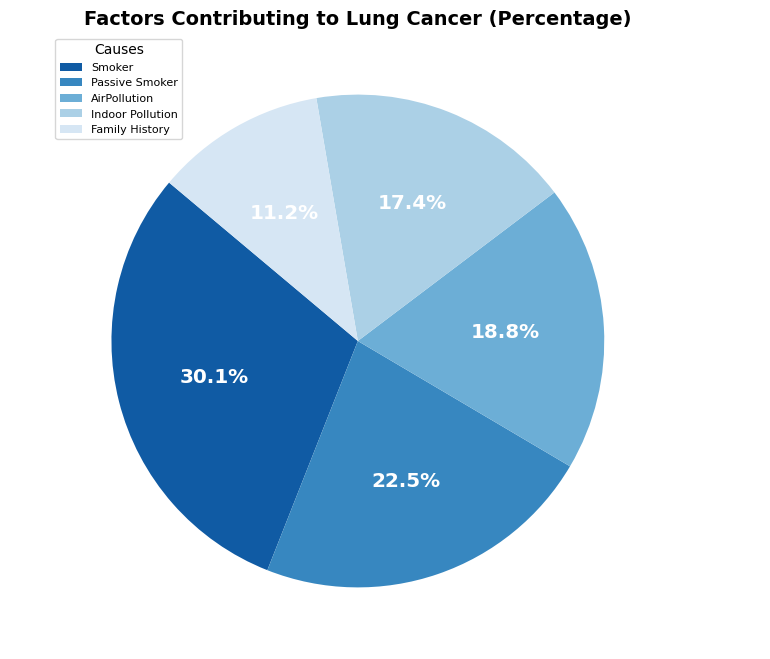

In [14]:
# Creating pie chart to display factors contributing to cancer
cancer_causes = {
    'AirPollution': (df['AirPollution'] == 'High').sum(),
    'Family History': (df['FamHistory'] == 'Yes').sum(),
    'Smoker': (df['Smoker'] == 'Yes').sum(),
    'Passive Smoker': (df['PassiveSmoke'] == 'Yes').sum(),
    'Indoor Pollution': (df['IndoorPoll'] == 'Yes').sum()
}
cause_df = pd.DataFrame(list(cancer_causes.items()), columns=['Cause', 'Count'])
# Convert count to percentage
cause_df['Percentage'] = (cause_df['Count'] / cause_df['Count'].sum()) * 100

# Sort data so the largest factor gets the darkest color
cause_df = cause_df.sort_values(by="Percentage", ascending=False)
colors = sns.color_palette("Blues_r", len(cause_df))

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    cause_df['Percentage'], 
    labels=cause_df['Cause'], 
    autopct='%.1f%%',  # Show percentages
    colors=colors,  # Apply color gradient
    textprops={'size': 'x-large', 'fontweight': 'bold', 'color': 'white'},
    startangle=140
)
plt.legend(title="Causes", loc='upper left', fontsize=8)
plt.title('Factors Contributing to Lung Cancer (Percentage)', fontsize=14, fontweight='bold')
plt.show()




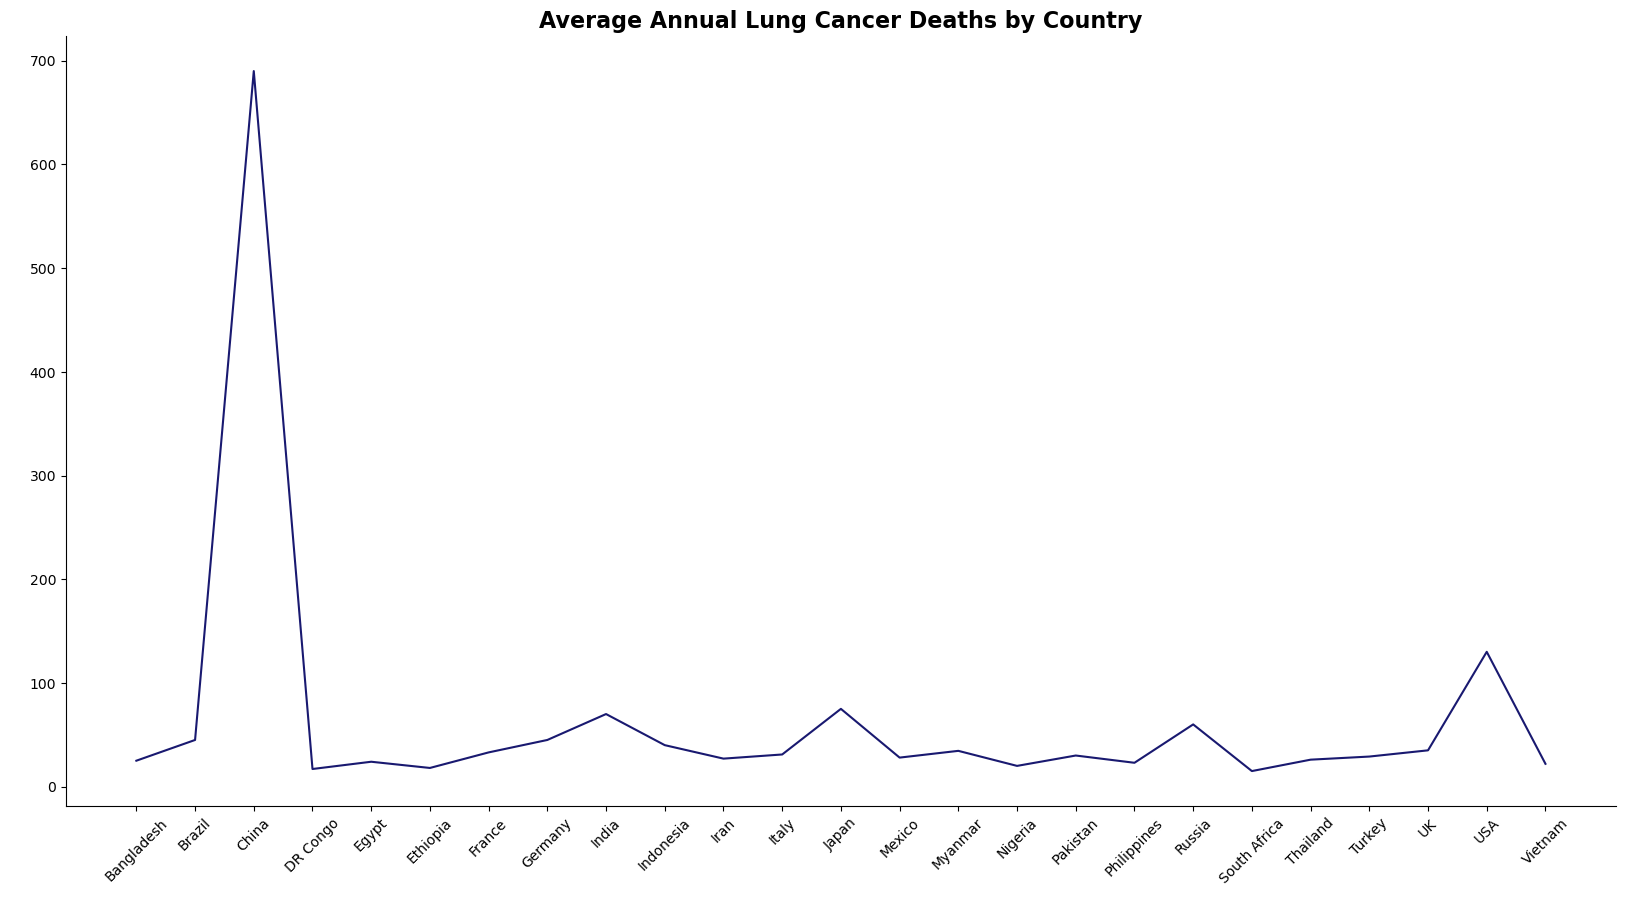

In [15]:
# Creating line chart to display Average Annual Lung Deaths by Country
avg_deaths_by_country = df.groupby('Country')['CancerDeaths'].mean().reset_index()

plt.figure(figsize=(20,10))
sns.lineplot(x='Country', y='CancerDeaths', data=avg_deaths_by_country, color='midnightblue')
plt.xlabel(' ') 
plt.ylabel(' ')
plt.title('Average Annual Lung Cancer Deaths by Country', fontsize=16, fontweight='bold')
plt.xticks(rotation=45) 

sns.despine()
plt.show()

In [16]:
# Creating bar chart to display top 10 countries with highest cancer cases
# Count cancer cases per country
lung_cancer_cases = df[df["CancerDiag"] == "Yes"] 
country_counts = lung_cancer_cases.groupby("Country").size().reset_index(name="Cases")
# Get the top 10 countries with the highest cancer cases
top_10 = country_counts.nlargest(10, 'Cases')
top_10 = top_10.reset_index(drop = True)
top_10

,Country,Cases
0,Ethiopia,409
1,Japan,398
2,Turkey,388
3,Nigeria,377
4,USA,377
5,Myanmar,373
6,Italy,372
7,Egypt,371
8,Indonesia,366
9,France,365


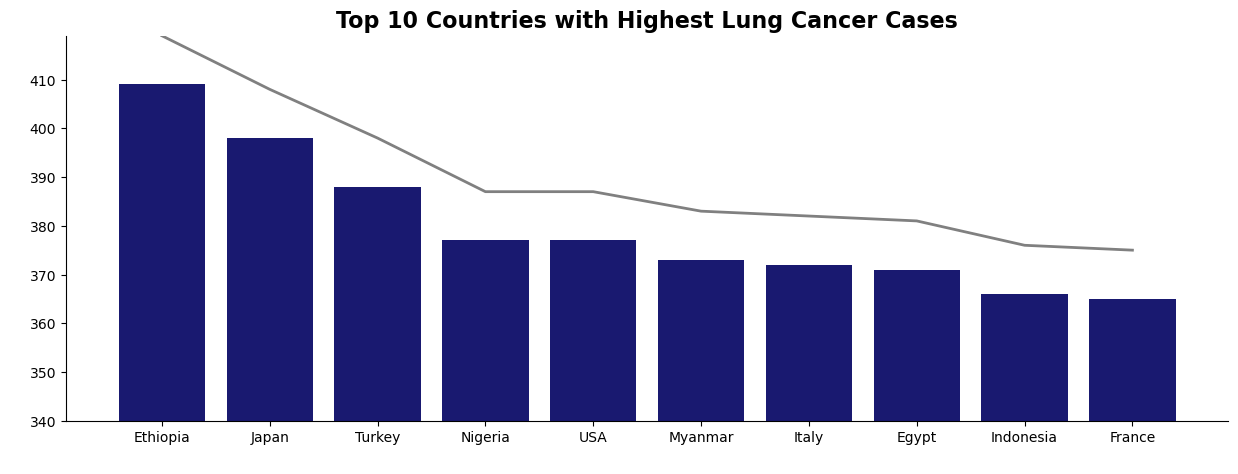

In [39]:
# Creating bar chart to display top 10 countries with highest lung cancer cases
plt.figure(figsize=(15, 5))
plt.bar(top_10["Country"], top_10["Cases"], color="midnightblue")
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("Top 10 Countries with Highest Lung Cancer Cases",fontsize = 16, color = "black", fontweight = 'bold')
plt.ylim(340, top_10["Cases"].max() + 10) 
plt.yticks(range(340, top_10["Cases"].max() + 10, 10))
plt.plot(top_10["Country"], top_10["Cases"]+ 10, color="grey", linestyle="-", linewidth=2)
sns.despine()
plt.show()